## CSE4/574 Coding Assignment Two

Submit the completed .ipynb file to UBLearns, no other materials needed

Include any additional information at the end of the .ipynb file if there is any

Submission deadline: 11:59PM, November 26, 2023

#### Person number: 50496401

#### Name: Sandeep Lankey (slankey)


### Support Vector Machines for linear separable data
For this part, you will need to implement naive SVM without kernel for classification on linear separable data. 

In [1]:
import numpy as np

#### SVM objective function with hinge loss
##### Decision function
The first thing to implement is the decision function $y = \mathbf{w}^T \mathbf{x}+b$. With decision function of our hard SVM, we are able to make prediction when new sample comes in $\hat{y}=\mathbf{f}_{\mathbf{w}}(\mathbf{x})=\operatorname{sign}\left(\mathbf{w}^T \mathbf{x}+b\right)=\left\{\begin{array}{l}
+1 \text { if } \mathbf{w}^T \mathbf{x}+b \geq 1 \\
-1 \text { if } \mathbf{w}^T \mathbf{x}+b\leq-1
\end{array}\right.$

Complete `svm_decision_function`:

In [2]:
def svm_decision_function(x, w, b):
    # ====================== TODO: YOUR CODE HERE, return w^Tx+b ======================
    pred = np.sign(np.dot(w, x) + b)
    return pred
    # =============================================================

#### Margin function for Optimization Formulation
Our naive objection is $\begin{aligned}
& \operatorname{minimize}_{\mathbf{w}, b} \frac{1}{2}\|\mathbf{w}\|^2 \\
& \text { subject to } y_i\left(\mathbf{w}^T \mathbf{x}_i+b ) \geq 1 \quad i=1, \ldots, N\right.
\end{aligned}$, 

which needs the implementation of the margin $y_i\left(\mathbf{w}^T \mathbf{x}+b\right)~~~~~~(1)$. Complete `margin`:

In [3]:
def margin(x, y, w, b):
    # ====================== YOUR CODE HERE, caculate (1) ======================
    return y * svm_decision_function(x, w, b)
    # =============================================================

#### SVM objective function with Hinge loss
The SVM objective function with Hinge loss is defined as: 

$J(\mathbf{w}, b )=\frac{1}{2}\|\mathbf{w}\|^2+C\left[\frac{1}{n} \sum_{i=1}^n \max \left(0,1-y_i\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}_i+b\right)\right)\right]~~~~~~~~(2)$, 

where $\frac{1}{2}\|\mathbf{w}\|^2$ control the margin size, and the hinge loss $\frac{1}{n} \sum_{i=1}^n \max \left(0,1-y_i\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}_i+b\right)\right)$ ensures that the $\mathbf{x}_i$
lies on the correct side of the margin. Parameter $C$ determines the trade-off between them.

We first implement the hinge loss $\frac{1}{n} \sum_{i=1}^n \underbrace{\max \left(0,1-y_i\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}_i+b\right)\right)}_{\text{Hinge loss for one data point}}$ for the SVM objective function $J(\mathbf{w}, b)$. Complete `hinge_loss`:

In [4]:
def hinge_loss(x, y, w, b):
    # ====================== TODO: YOUR CODE HERE, return the hinge loss value for one data point ======================
    h_loss = max(0, 1 - y * (np.dot(w, x) + b))
    return h_loss
    # =============================================================

With defined hinge loss function, $J(\mathbf{w}, b)$ is very straightforward. Complete `svm_objective_function` $J(\mathbf w, b)$:

In [5]:
def svm_objective_function(X, y, w, b, C):
    # ====================== X is a list of training data points ========================
    # ====================== TODO: YOUR CODE HERE, return SVM objective with hinge loss (2) for the list of training data X =============
    n = len(y)
    h_loss_sum = 0
    for i in range(n):
        marg_val = y[i] * (np.dot(w, X[i, :]) + b)
        h_loss_i = max(0, 1 - marg_val)
        h_loss_sum += h_loss_i
    reg_term = 0.5 * np.dot(w, w)
    func_res = reg_term + C * (h_loss_sum / n)
    return func_res
    # =============================================================

We will utilize stochastic gradient descent (SGD) with learning rate $\eta$ to find the optimal $\mathbf{w}$ and $b$ with $J(\mathbf{w}, b)$, that is: 

$\mathbf{w}_{t+1}= \mathbf{w}_{t}-\eta\frac{\partial J(\mathbf{w}_{t}, b)}{\partial \mathbf{w}_{t}}$;

$b_{t+1}= b_{t}-\eta\frac{\partial J(\mathbf{w}, b_{t})}{\partial b_{t}}$.

With $J(\mathbf{w}, b )=\frac{1}{2}\|\mathbf{w}\|^2+C\left[\frac{1}{n} \sum_{i=1}^n \max \left(0,1-y_i\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}_i+b\right)\right)\right]$, we can get：

$\begin{aligned}
\mathbf{w}_{t+1} & \leftarrow \left(1-\eta\right) \mathbf{w}_t+\eta C \frac{1}{m} \sum_{i=1}^m y_i \mathbf{x}_i & & \text { if }  y_i\left(\mathbf{w}^T \mathbf{x}_i+b \right) < 1 \\
& \leftarrow \left(1-\eta\right) \mathbf{w}_t & & \text { otherwise }
\end{aligned}$;

$\begin{aligned}
b_{t+1} & \leftarrow b_t+\eta C \frac{1}{m} \sum_{i=1}^m y_i & & \text { if } y_i\left(\mathbf{w}^T \mathbf{x}_i+b \right) < 1 \\
& \leftarrow b_t & & \text { otherwise }
\end{aligned}$.

Now let's implement the gradient descent `gradient_descent` above:

In [6]:
def gradient_descent(X, y, learning_rate, num_iterations, C):
    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    b = 0.0
    # ====================== TODO: YOUR CODE HERE, complete the gradient descent for SVM described above ======================

    for _ in range(num_iterations):
        for i in np.random.permutation(len(X)):
            xi = X[i]
            yi = y[i]
            d_val = np.dot(w, xi) + b
            if yi * d_val < 1:
                w = w + learning_rate * (C * yi * xi - (1 - learning_rate) * w)
                b = b + learning_rate * C * yi

    # =============================================================
    return w, b

#### Prepare linear separable data
After completing each part of SVM for linear separable data, let's prepare data!
Load data from `hw2data1.mat` (consists of data['X'] and data['y']), reformat X to be float type and y to be int type, and replace label 0 with -1 in y:

In [7]:
# load linear separable data from hw2data1.mat
from scipy.io import loadmat
# ====================== TODO: YOUR CODE HERE, load the data and do necessary transformations ======================
# ================ return (X, y) where X is a list of training data and y the list of labels ===============

filename = '/Users/sandeeplankey/Documents/Sem_2/ML/coding-2/hw2data1.mat'
loaded_data = loadmat(filename)

X = loaded_data.get('X', np.array([])).squeeze().astype(float)
y = loaded_data.get('y', np.array([])).squeeze().astype(int)
if len(X) == 0 or len(y) == 0:
    raise ValueError("Invalid data format in the provided file.")
y[y == 0] = -1

print("First few samples of X:")
print(X[:10, :])
print("\nFirst few samples of y:")
print(y[:10])

# =============================================================

First few samples of X:
[[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]
 [2.932  3.5519]
 [3.5772 2.856 ]
 [4.015  3.1937]
 [3.3814 3.4291]
 [3.9113 4.1761]
 [2.7822 4.0431]
 [2.5518 4.6162]]

First few samples of y:
[1 1 1 1 1 1 1 1 1 1]


#### Training
Pick your learning rate, number of iterations for gradient descent and parameter $C$ for $J(\mathbf{w}, b)$. Please try different parameter settings and choose the best ones. Make sure your choice will lead good fit for the training data. Optimize $\mathbf{w}$ and $b$ using `gradient_descent`:

In [8]:
# Hyperparameters
# ====================== TODO: YOUR CODE HERE, try different hyperparameters ======================
learning_rate = 0.0001 ## or your choices
num_iterations = 10000 ## or your choices
C = 100 ## or your choices

# Trainning
# ====================== TODO: YOUR CODE HERE, compute/return (w, b) ======================
w, b = gradient_descent(X, y, learning_rate, num_iterations, C)
print("Learned Weight Vector:", w)
print("Learned Bias Term:", b)
# =============================================================

Learned Weight Vector: [2.2296703  4.79546371]
Learned Bias Term: -20.890000000000466


#### Test
With updated $\mathbf{w}$ and $b$, how good does your trained SVM fit the training data?

Implement a prediction function `linear_svm_Predict` according  $\hat{y}=\mathbf{f}_{\mathbf{w}}(\mathbf{x})=\operatorname{sign}\left(\mathbf{w}^T \mathbf{x}+b\right)=\left\{\begin{array}{l}
+1 \text { if } \mathbf{w}^T \mathbf{x}+b \geq 1 \\
-1 \text { if } \mathbf{w}^T \mathbf{x}+b\leq-1
\end{array}\right.~~~~~~~~~~~~~(3)$,

and test prediction on your training data to find out how good your trained SVM fit the training data:

In [9]:
# Testing (fill in the code for testing)
# Use the trained w and b to make predictions
def linear_svm_Predict(X_pred,w,b):
    # X_pred is a list consisting of multiple data points
    # ====================== TODO: YOUR CODE HERE, return all predictions in a list for 
    # the list of data points in X_pred following (3) ======
    
    predn = np.sign(np.dot(X_pred, w) + b)
    return predn
    
    # =============================================================
    
# check the number of wrong predictions 
sum(linear_svm_Predict(X,w,b)-y)

# =============================================================

-2.0

#### Visualiztion of the decision boundary and test again
We provide you with following visualiztion functions, try to visualize your decision boundary, is it good enough?

According the visualiztion, pick new 10 data samples and check if your model can make correct prediction.

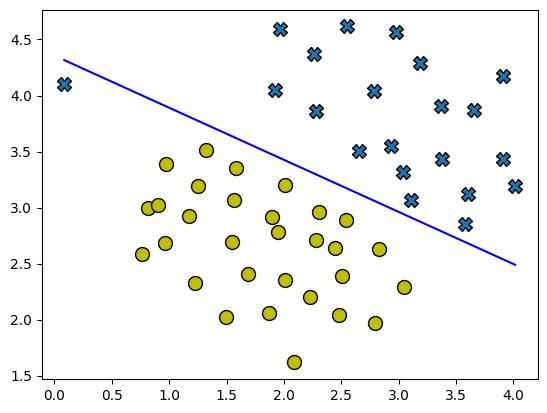

Predictions for 10 new samples: [-1  1  1 -1  1 -1 -1 -1 -1  1]
Ground truth for 10 new samples: [-1  1  1 -1  1 -1 -1 -1 -1  1]


In [10]:
import matplotlib.pyplot as plt
def plotData(X, y, grid=False):
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == -1

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'X', mew=1, ms=10, mec='k')
    plt.plot(X[neg, 0], X[neg, 1], 'o', mew=1, mfc='y', ms=10, mec='k')
    plt.grid(grid)
def visualizeBoundaryLinear(X, y, w, b):
    xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    yp = -(w[0] * xp + b)/w[1]

    plotData(X, y)
    plt.plot(xp, yp, '-b')

# Implement code to plot the decision boundary
visualizeBoundaryLinear(X, y, w, b)
# =============================================================
plt.show()

# Pick 10 new samples, make prediction and evaluation
# ====================== TODO: YOUR CODE HERE, print out the predictions and ground truth of your chosen data =======

np.random.seed(0)
num_samples_to_select = 10
rand_ind = np.random.choice(len(X), num_samples_to_select, replace=False)
X_new_samples = np.zeros((num_samples_to_select, X.shape[1]))
y_ground_truth = np.zeros(num_samples_to_select, dtype=int)
preds_new_samples = np.zeros(num_samples_to_select, dtype=int)
for i, idx in enumerate(rand_ind):
    X_new_samples[i, :] = X[idx, :]
    y_ground_truth[i] = y[idx]
    preds_new_samples[i] = linear_svm_Predict(X_new_samples[i, :], w, b)
print("Predictions for", num_samples_to_select, "new samples:", preds_new_samples)
print("Ground truth for", num_samples_to_select, "new samples:", y_ground_truth)

# =============================================================

### Support Vector Machines for linear non-separable data
In this part, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

In Kernel SVM, the objective function with hinge loss is similar: 

$J(\mathbf{u}, b) = C {\displaystyle \sum\limits_{i=1}^{N} \underbrace{max\left(0, 1 - y^{(i)} (\mathbf{u}^t \cdot \mathbf{K}(:, \mathbf x_i) + b)\right)}}_{\text{Kernel hinge loss for one data point}} +  \dfrac{1}{2} \mathbf{u}^t \cdot  \mathbf{K} \cdot \mathbf{u}~~~~~~~~~~~(4)$

Here, $\mathbf{w}$ becomes $\mathbf w = \phi(\mathbf X)\cdot \mathbf u$ with $\phi(\mathbf X)\triangleq (\phi(\mathbf x_1), \cdots, \phi(\mathbf x_N))$ and $\mathbf u$ the new parameter. As a result, in $J(\mathbf{u}, b)$, we have $\mathbf w^t \phi(\mathbf x)=\mathbf u^t \cdot \mathbf K(:, \mathbf x)$ where $K(:, \mathbf x)$ means the $\mathbf x$-column of the kernel matrix. Also, due to $\mathbf K = \phi(\mathbf X)^t\phi(\mathbf X)$, we have $\mathbf w^t\mathbf w = \mathbf u^t\mathbf K\mathbf u$.

We will not provide you  with gradient derivation at this time. But formulas above will be helpful.

#### Gaussian kernels and matrix
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
You should now complete the code in `gaussianKernel` to compute the Gaussian kernel between two examples, ($x^{(i)}$, $x^{(j)}$). The Gaussian kernel function is defined as:

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)~~~~~~~~~(4)$$

In [11]:
def gaussianKernel(x1, x2, sigma):
    # ====================== TODO: YOUR CODE HERE, return the similarity of the 
    # two data points under Gaussian kernel following (4) =======

    x1 = np.array(x1)
    x2 = np.array(x2)
    dist = np.sum((x1 - x2) ** 2)
    sim = np.exp(-dist / (2 * sigma**2))
    
    # =============================================================
    return sim

Given training data $X$ in terms of a list of data points, compute the Gaussian kernel matrix for future training usage, complete `KernelMatrix`:

In [12]:
def KernelMatrix(X, sigma):
    # ====================== TODO: YOUR CODE HERE, return the Gaussian kernel matrix for the input data list X ===============
            
    import numpy as np
    X = np.array(X)
    m = X.shape[0]
    K = np.fromfunction(lambda i, j: gaussianKernel(X[i, :], X[j, :], sigma), (m, m), dtype=int)    

    # =============================================================
    return K

#### Kernel SVM objective function with hinge loss
##### Decision function
The first thing to implement is the decision function $\mathbf{u}^T \cdot \mathbf{K}(\cdot, \mathbf x) + b$. With decision function of our kernel SVM, we are able to make prediction when new sample comes in $\hat{y}=\mathbf{f}_{\mathbf{w}}(\mathbf{x})=\operatorname{sign}\left(\mathbf{u}^T \cdot \mathbf{K}(\cdot, \mathbf x) + b\right)=\left\{\begin{array}{l}
+1 \text { if } \mathbf{u}^T \cdot \mathbf{K}(\cdot, \mathbf x)+ b \geq 1 \\
-1 \text { if } \mathbf{u}^T \cdot \mathbf{K}(\cdot, \mathbf x)+ b\leq-1
\end{array}\right.$

Complete `svm_decision_function_kernel`:

In [13]:
def svm_decision_function_kernel(u, b, kernel_i):
    # ====================== TODO: YOUR CODE HERE ======================
    # === Implement u^T K(:, x_i) + b ==
    # ===== kernel_i is the i-th column of the kernel matrix =====

    u = np.array(u)
    kernel_i = np.array(kernel_i)
    decision_function = np.dot(u.T, kernel_i) + b
    return decision_function

    # =============================================================

Similar to what we have done in the SVM for linear separable data, complete the `margin_kernel`, `kernel_hinge_loss`, `kernel_svm_objective_function` function blow:

In [14]:
def margin_kernel(y, u, b, kernel_i):
    # ======= TODO: Implement y * svm_decision_function_kernel for one data point =========
    # ====================== YOUR CODE HERE ======================

    y = np.array(y)
    u = np.array(u)
    kernel_i = np.array(kernel_i)
    margin = y * svm_decision_function_kernel(u, b, kernel_i)
    return margin

    # =============================================================

In [15]:
def kernel_hinge_loss(y, u, b, kernel_i):
    # ====================== TODO: YOUR CODE HERE, return the kernel hinge loss 
    # for one data point ======================

    y = np.asarray(y)
    u = np.asarray(u)
    kernel_i = np.asarray(kernel_i)
    margin = y * svm_decision_function_kernel(u, b, kernel_i)
    hi_loss = np.maximum(0, 1 - margin)
    return hi_loss

    # =============================================================

In [16]:
def kernel_svm_objective_function(kernel_matrix, y, u, b, C):
    # ====================== TODO: YOUR CODE HERE, return the kernel SVM objective values 
    # with hinge loss in (4) for the training data =================

    y = np.asarray(y)
    u = np.asarray(u)
    kernel_matrix = np.asarray(kernel_matrix)
    hinge_losses = np.maximum(0, 1 - y * kernel_hinge_loss(u, b, kernel_matrix.T, y))
    objective_value = C * np.sum(hinge_losses) + 0.5 * np.dot(u, np.dot(kernel_matrix, u))
    return objective_value
    
    # =============================================================

#### SGD for Kernel SVM
We will utilize stochastic gradient descent (SGD) with learning rate $\eta$ to find the optimal $\mathbf{u}$ and $b$ with $J(\mathbf{u}, b)$, that is: 

$\mathbf{u}_{t+1}= \mathbf{u}_{t}-\eta\frac{\partial J(\mathbf{u}_{t}, b)}{\partial \mathbf{u}_{t}}$;

$b_{t+1}= b_{t}-\eta\frac{\partial J(\mathbf{w}, b_{t})}{\partial b_{t}}$.

Given $J(\mathbf{u}, b) = C {\displaystyle \sum\limits_{i=1}^{m} max\left(0, 1 - y^{(i)} (\mathbf{u}^t \cdot \mathbf{K}(:, \mathbf x_i) + b)\right)} +  \dfrac{1}{2} \mathbf{u}^t \cdot  \mathbf{K} \cdot \mathbf{u}$, the derivatives of $\mathbf{u}_{t+1}$ and $b_{t+1}$ are given below: 

$\begin{aligned}
\mathbf{u}_{t+1} & \leftarrow \mathbf{u}_t-\eta\mathbf{K}\cdot\mathbf{u}_t+\eta C \frac{1}{m} \sum_{i=1}^m y_{i} \mathbf{K}\left(:, \mathbf{x}_i\right) & & \text { if }  y_i\left(\mathbf{u}_t \cdot \mathbf{K}\left(:, \mathbf{x}_i\right)+b \right) < 1 \\
& \leftarrow \mathbf{u}_t-\eta\mathbf{K}\cdot\mathbf{u}_t & & \text { otherwise }
\end{aligned}$;

$\begin{aligned}
b_{t+1} & \leftarrow b_t+\eta C \frac{1}{m} \sum_{i=1}^m y_{i} & & \text { if }  y_i\left(\mathbf{u}_t \cdot \mathbf{K}\left(:, \mathbf{x}_i\right)+b \right) < 1 \\
& \leftarrow b_t & & \text { otherwise }
\end{aligned}$.

Implement `gradient_descent_kernel`:


In [17]:
def gradient_descent_kernel(X, y, learning_rate, num_iterations, C, kernel_matrix):
    u = np.zeros([X.shape[0],1])
    b = 0.0
    # ====================== TODO: YOUR CODE HERE, complete the gradient descent 
    # for kernel SVM described above ======================

    m = X.shape[0]
    for _ in range(num_iterations):
        grad_u = -learning_rate * np.dot(kernel_matrix, u)
        grad_b = 0.0
        for i in range(m):
            margin_i = margin_kernel(y[i], u, b, kernel_matrix[:, i])
            if margin_i < 1:
                grad_u += learning_rate * C * y[i] * np.reshape(kernel_matrix[:, i], (m, 1))
                grad_b += learning_rate * C * y[i]
        u = u + grad_u
        b = b + grad_b / m

    # =============================================================

    return u, b

#### Prepare linear non-separable data
After completing each part of SVM for linear separable data, let's prepare data!
Load data from `hw2data2.mat` and replace label 0 with -1 in y:

In [18]:
# ====================== TODO: YOUR CODE HERE ======================
# ===== Load and transform data, similar to the linear case ===========================

from scipy.io import loadmat

filename = '/Users/sandeeplankey/Documents/Sem_2/ML/coding-2/hw2data2.mat'
loaded_data = loadmat(filename)

X = loaded_data.get('X', np.array([])).squeeze().astype(float)
y = loaded_data.get('y', np.array([])).squeeze().astype(int)
if len(X) == 0 or len(y) == 0:
    raise ValueError("Invalid data format in the provided file.")
y[y == 0] = -1

# =============================================================

Compute the Kernel Matrix for training data for future training usage utilize `KernelMatrix`:

In [19]:
sigma= 0.1
# ====================== TODO: YOUR CODE HERE, return the kernel_matrix from the training data ======================
# ================ return (X, y) where X is a list of training data and y the list of labels ===============

# def gaussianKernel(x1, x2, sigma):

def KernelMatrix(X, sigma):
    m = X.shape[0]
    ker_mat = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            ker_mat[i, j] = gaussianKernel(X[i, :], X[j, :], sigma)
    return ker_mat

ker_mat = KernelMatrix(X, sigma)

# =============================================================

#### Training
Pick your learning rate, number of iterations for gradient descent and parameter $C$ for $J(\mathbf{u}, b)$. You can try multiple parameter choices. Make sure your choice will lead good fit for the training data. Optimize $\mathbf{u}$ and $b$ using `gradient_descent_kernel`:

In [20]:
# Hyperparameters
# ====================== TODO: YOUR CODE HERE, try different hyperparameters ======================
learning_rate = 0.001
num_iterations = 4000
C = 700

# Training
# ====================== TODO: YOUR CODE HERE, return (u, b) ======================

u, b = gradient_descent_kernel(X, y, learning_rate, num_iterations, C, ker_mat)

# =============================================================

#### Test
With updated $\mathbf{u}$ and $b$, how good does your trained SVM fit the training data?

Implement a prediction function `kernel_svm_Predict` according $\hat{y}=\mathbf{f}_{\mathbf{w}}(\mathbf{x})=\operatorname{sign}\left(\mathbf{u}^T \cdot \mathbf{K}(:, \mathbf x_i) + b\right)=\left\{\begin{array}{l}
+1 \text { if } \mathbf{u}^T \cdot \mathbf{K}(:, \mathbf x_i)+ b \geq 1 \\
-1 \text { if } \mathbf{u}^T \cdot \mathbf{K}(:, \mathbf x_i)+ b\leq-1
\end{array}\right.$,

and test prediction on your training data to find out how good your trained SVM fit the training data:

hint: when make predictions on new data $\mathbf x$, new $\mathbf{K}(:, \mathbf x)$ needs to be computed between test data $\mathbf x \in X$\_pred and training data $\mathbf X$.

In [21]:
# Testing (fill in the code for testing)
# Use the trained w and b to make predictions, return predictions (1 or -1) for all x in X_pred
def kernel_svm_Predict(X_pred,X,u,b):
    prediction=[]
    # ======= TODO: YOUR CODE HERE, return all predictions in a list for the list of data points in X_pred ============

    for ele in X_pred:
        knl = np.exp(-np.sum((X - ele) ** 2, axis=1) / (2 * sigma ** 2))
        decision_function = svm_decision_function_kernel(u, b, knl)
        prediction.append(1 if decision_function >= 1 else -1)
    return prediction

# check the number of wrong predictions 
sum(kernel_svm_Predict(X,X,u,b)-y)

# =============================================================

4

#### Visualiztion of the decision boundary and test again
We provide you with following visualiztion functions, try to visualize your decision boundary, is it good enough?

According the visualiztion, pick new 10 data samples and check if your model can make correct prediction.

In [22]:
print(X.shape)
def visualizeBoundary(X,y,u,b):
    plotData(X, y)
    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)
    
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.stack((X1[:, i], X2[:, i]), axis=1)
        vals[:, i] = kernel_svm_Predict(this_X, X,u,b)

    plt.contour(X1, X2, vals, colors='y', linewidths=2)
    plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)
    plt.grid(False)

(863, 2)


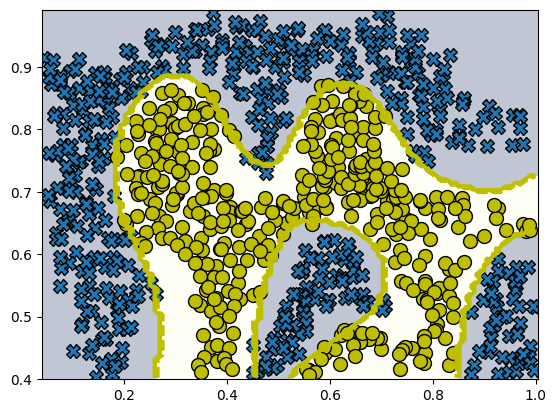

Predictions: [[1, -1], [1, 1], [1, -1], [1, 1], [-1, 1], [-1, -1], [1, 1], [1, 1], [-1, 1], [1, 1]]
Ground Truth: [ 1  1 -1  1 -1 -1 -1  1 -1  1]


In [23]:
# Plot the decision boundary
visualizeBoundary(X,y,u,b)
# =============================================================
plt.show()

# Pick 10 new samples, make prediction and evaluation
# ====================== TODO: YOUR CODE HERE, print out the predictions and ground truth of your chosen data ===========

new_sample_indices = np.random.choice(X.shape[0], 10, replace=False)
new_samples = X[new_sample_indices, :]
ground_truth = y[new_sample_indices]
predictions = [kernel_svm_Predict(sam, X, u, b) for sam in new_samples]
print("Predictions:", predictions)
print("Ground Truth:", ground_truth)

# =============================================================

In [24]:
#Anything else below:
